# Downstream analysis for the breast cancer dataset

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
from scipy.io import mmread
import os
import sys
from scipy.spatial.distance import cdist

import STitch3D

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [2]:
output_path = "./results_breast_cancer"
result = []

for i in range(3):
    adata_st_i = ad.read_h5ad(output_path + "/res_adata_slice%d.h5ad" % i)
    result.append(adata_st_i)

In [3]:
latent = pd.read_csv(output_path+'/representation.csv', index_col=0)

adata_all = ad.concat([result[i] for i in range(len(result))], index_unique=None).copy()
adata_all = adata_all[latent.index]
adata_all.obsm['latent'] = np.array(latent.values)
sc.pp.neighbors(adata_all, use_rep='latent', n_neighbors=10)
sc.tl.umap(adata_all)

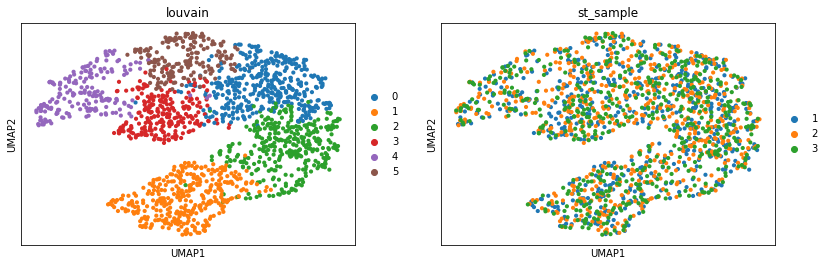

In [4]:
sc.tl.louvain(adata_all, resolution=0.5)
sc.pl.umap(adata_all, color=["louvain", 'st_sample'])

Slice 1


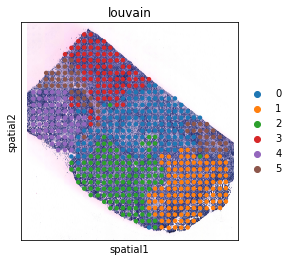

Slice 2


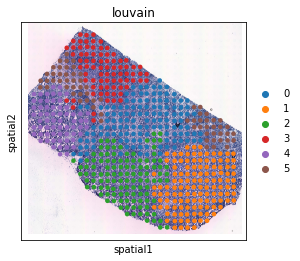

Slice 3


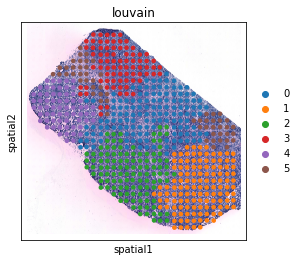

In [5]:
for i, adata_st_i in enumerate(result):
    print("Slice %d" % (i+1))
    tmp = adata_all[adata_st_i.obs.index, :]
    adata_st_i.obs["louvain"] = tmp.obs["louvain"].values.astype(str)
    sc.pl.spatial(adata_st_i, img_key="hires", color="louvain", spot_size=200.)

In [6]:
adata_all.obs["louvain"].to_csv(os.path.join(output_path, "clustering_result.csv"))

## Transfer pathologist annotation

In [7]:
adata_annotated = adata_all[adata_all.obs['annotation'] != "Unknown"]
adata_unannotated = adata_all[adata_all.obs['annotation'] == "Unknown"]

Y = cdist(adata_annotated.obsm['latent'], adata_unannotated.obsm['latent'], 'euclidean')

adata_unannotated.obs['annotation'] = adata_annotated.obs["annotation"][np.argmin(Y, axis=0)].values

for i, adata_st_i in enumerate(result):
    if i > 0:
        adata_st_i.obs['annotation'] = adata_unannotated[adata_st_i.obs.index].obs['annotation']

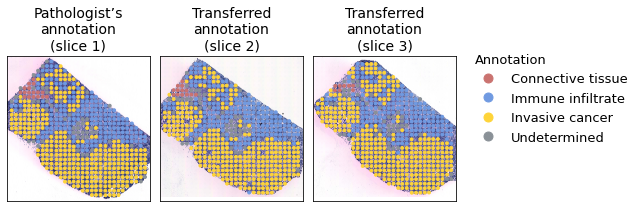

In [8]:
cl = ["#CA7370", "#709AE1FF", "#FED439FF", "#8A9197FF"]
colours_ct = ListedColormap(cl)
annotations = ["connective tissue", "immune infiltrate", "invasive cancer", "undetermined"]
annotations_it = ["Connective tissue", "Immune infiltrate", "Invasive cancer", "Undetermined"]
fs_title = 14

f = plt.figure(figsize=(9,3))

ax1 = f.add_subplot(1,3,1)
i = 0
label_ct = result[i].obs["annotation"].apply(lambda x: annotations.index(x))
ax1.axis('equal')
ax1.imshow(result[i].uns["spatial"]['st']['images']['hires'])
s1 = plt.scatter(result[i].obsm['spatial'][:, 0], result[i].obsm['spatial'][:, 1], 
            c=label_ct, s=8, cmap=colours_ct)
ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
ax1.set_title("Pathologist’s\nannotation\n(slice %d)" % (i+1), fontsize=fs_title)
xmin = np.min(np.array(result[i].obsm['spatial'][:, 0]))
xmax = np.max(np.array(result[i].obsm['spatial'][:, 0]))
ymin = np.min(np.array(result[i].obsm['spatial'][:, 1]))
ymax = np.max(np.array(result[i].obsm['spatial'][:, 1]))
ax1.set_xlim([xmin-200, xmax+200])
ax1.set_ylim([ymin-200, ymax+200])
ax1.invert_yaxis()

ax1 = f.add_subplot(1,3,2)
i = 1
label_ct = result[i].obs["annotation"].apply(lambda x: annotations.index(x))
ax1.axis('equal')
ax1.imshow(result[i].uns["spatial"]['st']['images']['hires'])
s1 = plt.scatter(result[i].obsm['spatial'][:, 0], result[i].obsm['spatial'][:, 1], 
            c=label_ct, s=8, cmap=colours_ct)
ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
ax1.set_title("Transferred\nannotation\n(slice %d)" % (i+1), fontsize=fs_title)
xmin = np.min(np.array(result[i].obsm['spatial'][:, 0]))
xmax = np.max(np.array(result[i].obsm['spatial'][:, 0]))
ymin = np.min(np.array(result[i].obsm['spatial'][:, 1]))
ymax = np.max(np.array(result[i].obsm['spatial'][:, 1]))
ax1.set_xlim([xmin-200, xmax+200])
ax1.set_ylim([ymin-200, ymax+200])
ax1.invert_yaxis()

ax1 = f.add_subplot(1,3,3)
i = 2
label_ct = result[i].obs["annotation"].apply(lambda x: annotations.index(x))
ax1.axis('equal')
ax1.imshow(result[i].uns["spatial"]['st']['images']['hires'])
s1 = plt.scatter(result[i].obsm['spatial'][:, 0], result[i].obsm['spatial'][:, 1], 
            c=label_ct, s=8, cmap=colours_ct)
ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off
ax1.set_title("Transferred\nannotation\n(slice %d)" % (i+1), fontsize=fs_title)
xmin = np.min(np.array(result[i].obsm['spatial'][:, 0]))
xmax = np.max(np.array(result[i].obsm['spatial'][:, 0]))
ymin = np.min(np.array(result[i].obsm['spatial'][:, 1]))
ymax = np.max(np.array(result[i].obsm['spatial'][:, 1]))
ax1.set_xlim([xmin-200, xmax+200])
ax1.set_ylim([ymin-200, ymax+200])
ax1.invert_yaxis()

l = ax1.legend(handles=s1.legend_elements(num=len(annotations)-1)[0], 
              labels=annotations_it, 
              loc="upper left", bbox_to_anchor=(1.05, 1.1), 
              markerscale=1.5, title_fontsize=13, fontsize=13, 
              frameon=False, ncol=1, title="Annotation")
l._legend_box.align = "left"

f.subplots_adjust(hspace=.1, wspace=.1)
f.tight_layout()

## GO analysis

In [9]:
adata_all_raw = ad.concat([result[i] for i in range(len(result))], index_unique=None).copy()

In [10]:
sc.pp.normalize_per_cell(adata_all_raw, counts_per_cell_after=1e4)
sc.pp.log1p(adata_all_raw)

In [11]:
sc.tl.rank_genes_groups(adata_all_raw, 'louvain', groups=['3'], reference='4', key_added = "3vs4")
sc.tl.rank_genes_groups(adata_all_raw, 'louvain', groups=['4'], reference='3', key_added = "4vs3")


g_3vs4 = list(sc.get.rank_genes_groups_df(adata_all_raw, group='3', key='3vs4', pval_cutoff=0.05, log2fc_min=0.25)['names'])
g_4vs3 = list(sc.get.rank_genes_groups_df(adata_all_raw, group='4', key='4vs3', pval_cutoff=0.05, log2fc_min=0.25)['names'])

In [12]:
import gseapy

In [13]:
enr_res = gseapy.enrichr(gene_list=g_3vs4,
                         organism='Human',
                         gene_sets='GO_Biological_Process_2023',
                         cutoff = 0.5)
enr_res.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,B Cell Receptor Signaling Pathway (GO:0050853),9/46,1.747871e-10,2.648024e-07,0,0,29.533908,663.551682,CD79B;IGHG3;IGHM;IGHG4;IGHG1;IGHG2;IGLC7;IGLC3...
1,GO_Biological_Process_2023,Antigen Receptor-Mediated Signaling Pathway (G...,11/134,2.275402e-08,1.723617e-05,0,0,10.945564,192.625767,IGHG3;CD79B;IGHG4;IGHM;IGHG1;IGHG2;IGLC7;IGLC3...
2,GO_Biological_Process_2023,Positive Regulation Of Cytokine Production (GO...,15/320,1.206221e-07,6.091418e-05,0,0,6.115589,97.425028,FCN1;TGFB1;LAPTM5;CYBA;ISG15;HLA-A;HLA-E;SULF2...
3,GO_Biological_Process_2023,Antigen Processing And Presentation Of Exogeno...,5/31,6.291009e-06,2.382720e-03,0,0,22.802856,273.095872,HLA-DRA;HLA-A;HLA-F;HLA-DPA1;HLA-E
4,GO_Biological_Process_2023,Negative Regulation Of Natural Killer Cell Med...,4/16,8.867750e-06,2.686928e-03,0,0,39.317460,457.383531,TGFB1;HLA-A;HLA-F;HLA-E


<AxesSubplot:title={'center':'3vs4'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

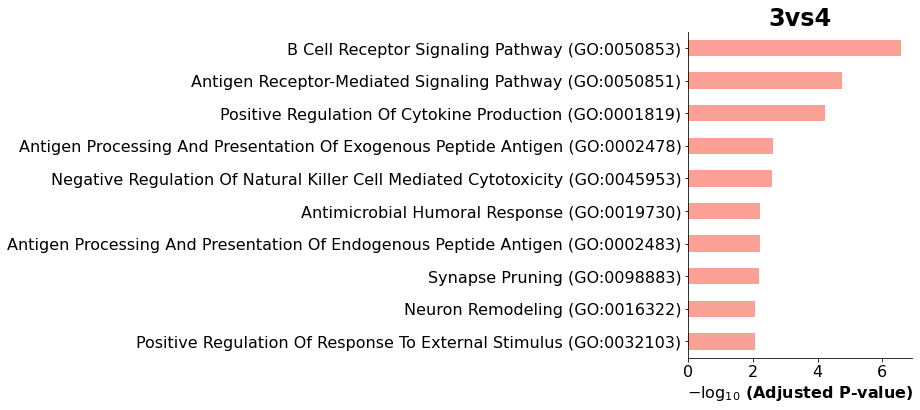

In [14]:
gseapy.barplot(enr_res.res2d,title='3vs4')

Text(0.5, 0, '$-\\log_{10}(P_{adj})$')

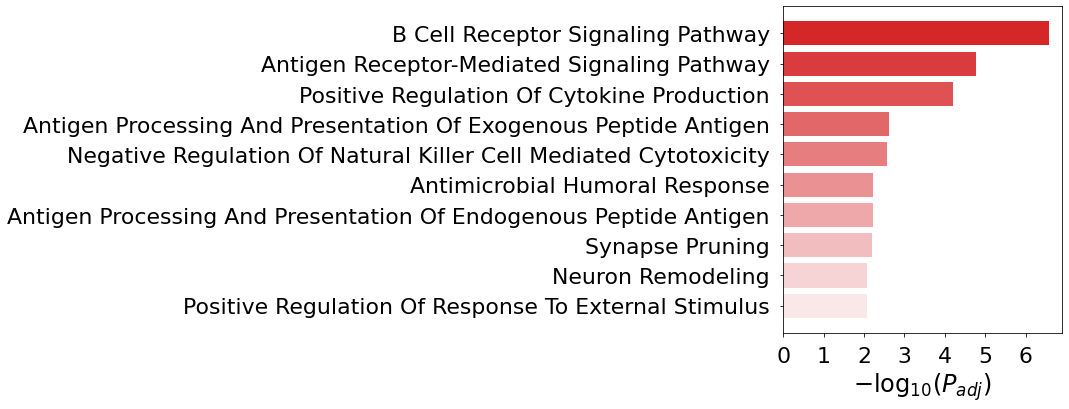

In [15]:
go_colors = ["#FFEBEDFF", "#FFCCD2FF", "#EE9999FF", "#E57272FF", "#EE5250FF", 
             "#F34335FF", "#E53934FF", "#D22E2EFF", "#C52727FF", "#B71B1BFF"][::-1]

import matplotlib.colors

alphas = np.linspace(0.1, 1, 10)
rgba_colors = np.zeros((10,4))
# for red the first column needs to be one
rgba_colors[:, :3] = matplotlib.colors.hex2color("tab:red")
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas
go_colors = rgba_colors[::-1]


plt.figure(figsize=(5,6))

for i in range(10):
    plt.barh(10-i, -np.log10(enr_res.results.loc[i]['Adjusted P-value']), color=go_colors[i])

plt.xticks(fontsize=22)
plt.yticks(10-np.arange(10), [go.split("(")[0][:-1] for go in enr_res.results['Term'][:10].values], fontsize=22)
ax = plt.gca()
ax.tick_params(axis='both', which='major', pad=10)
plt.xlabel("$-\log_{10}(P_{adj})$", fontsize=24)

In [16]:
enr_res = gseapy.enrichr(gene_list=g_4vs3,
                         organism='Human',
                         gene_sets='GO_Biological_Process_2023',
                         cutoff = 0.5)
enr_res.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Response To Endoplasmic Reticulum Stress (GO:0...,21/114,6.783280e-07,0.002044,0,0,4.022431,57.133143,PDIA3;PPP1R15B;VCP;XBP1;CEBPB;SEC16A;CCDC47;TR...
1,GO_Biological_Process_2023,Regulation Of Apoptotic Process (GO:0042981),69/705,1.170190e-06,0.002044,0,0,1.966163,26.854532,ITGB1;TOP2A;ARF4;TFRC;ARL6IP1;TRRAP;TRADD;HSPB...
2,GO_Biological_Process_2023,Regulation Of RNA Splicing (GO:0043484),19/102,1.915538e-06,0.002231,0,0,4.072278,53.613622,AHNAK;TRRAP;USP22;SRSF1;HNRNPLL;CLK2;PTBP3;HNR...
3,GO_Biological_Process_2023,Retrograde Axonal Transport (GO:0008090),7/15,5.692108e-06,0.004972,0,0,15.452614,186.612416,DYNC1H1;FBXW11;APEX1;KIF5B;KIF1C;SOD1;PAFAH1B1
4,GO_Biological_Process_2023,Protein Transport (GO:0015031),36/313,1.542611e-05,0.009037,0,0,2.325506,25.765322,ARF3;ARF4;COPB2;ARF1;COPA;TFRC;TMEM167A;SNX13;...


In [17]:
enr_res.results[:10]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Response To Endoplasmic Reticulum Stress (GO:0...,21/114,6.783280e-07,0.002044,0,0,4.022431,57.133143,PDIA3;PPP1R15B;VCP;XBP1;CEBPB;SEC16A;CCDC47;TR...
1,GO_Biological_Process_2023,Regulation Of Apoptotic Process (GO:0042981),69/705,1.170190e-06,0.002044,0,0,1.966163,26.854532,ITGB1;TOP2A;ARF4;TFRC;ARL6IP1;TRRAP;TRADD;HSPB...
2,GO_Biological_Process_2023,Regulation Of RNA Splicing (GO:0043484),19/102,1.915538e-06,0.002231,0,0,4.072278,53.613622,AHNAK;TRRAP;USP22;SRSF1;HNRNPLL;CLK2;PTBP3;HNR...
3,GO_Biological_Process_2023,Retrograde Axonal Transport (GO:0008090),7/15,5.692108e-06,0.004972,0,0,15.452614,186.612416,DYNC1H1;FBXW11;APEX1;KIF5B;KIF1C;SOD1;PAFAH1B1
4,GO_Biological_Process_2023,Protein Transport (GO:0015031),36/313,1.542611e-05,0.009037,0,0,2.325506,25.765322,ARF3;ARF4;COPB2;ARF1;COPA;TFRC;TMEM167A;SNX13;...
5,GO_Biological_Process_2023,Protein Localization (GO:0008104),39/351,1.551939e-05,0.009037,0,0,2.238932,24.792631,ARF3;ARF4;PTPRU;COPB2;ARF1;COPA;SNX13;ACTB;TM9...
6,GO_Biological_Process_2023,Protein Stabilization (GO:0050821),27/208,2.107866e-05,0.010521,0,0,2.659961,28.640462,URI1;GRN;HSP90AB1;CTNND1;RTN4;BAG6;RUVBL2;LAMP...
7,GO_Biological_Process_2023,Vesicle Cytoskeletal Trafficking (GO:0099518),10/39,3.009926e-05,0.012464,0,0,6.100026,63.507431,MYO1D;MYO1C;FBXW11;KIF5B;APEX1;MYO7A;CDR2L;FNB...
8,GO_Biological_Process_2023,"RNA Splicing, Via Transesterification Reaction...",24/180,3.836952e-05,0.012464,0,0,2.739162,27.852478,SRRM2;IK;DDX5;RBM14;SF3B2;SNRPN;PRPF38A;SF3B6;...
9,GO_Biological_Process_2023,Endoplasmic Reticulum To Golgi Vesicle-Mediate...,18/115,4.246247e-05,0.012464,0,0,3.295565,33.176091,COPB2;ARF4;COPA;TMED9;SEC24B;TRAPPC1;SEC16A;LM...


<AxesSubplot:title={'center':'4vs3'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

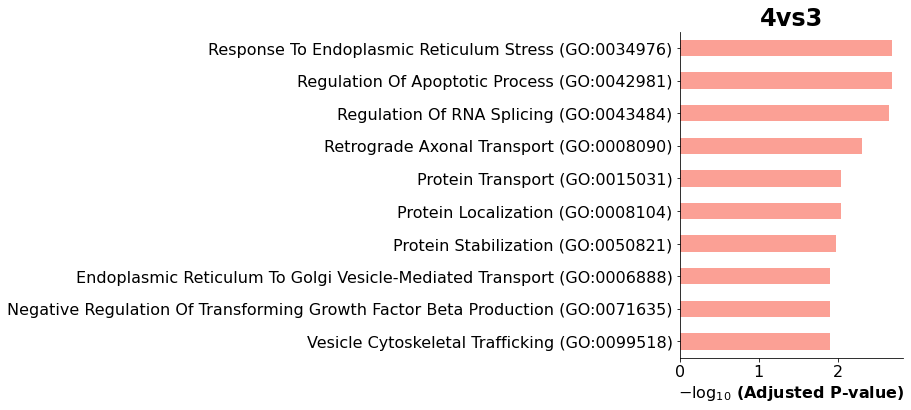

In [18]:
gseapy.barplot(enr_res.res2d,title='4vs3', cutoff=0.05)

Text(0.5, 0, '$-\\log_{10}(P_{adj})$')

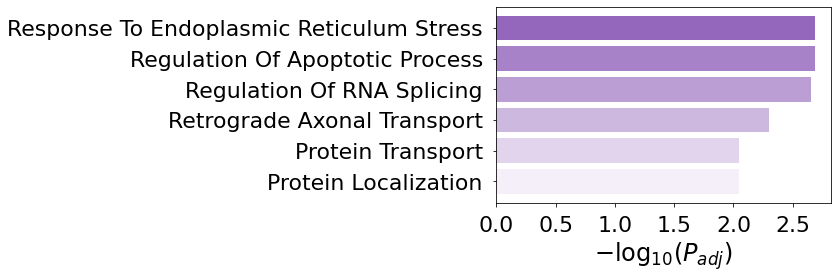

In [19]:
go_colors = ["#F2E5F4FF", "#E0BEE6FF", "#CD92D8FF", "#B967C7FF", "#AB46BBFF", 
             "#9B26B0FF", "#8D24AAFF", "#7A1FA1FF", "#6A1A99FF", "#4A138CFF"][::-1]

alphas = np.linspace(0.1, 1, 6)
rgba_colors = np.zeros((6,4))
# for red the first column needs to be one
rgba_colors[:, :3] = matplotlib.colors.hex2color("tab:purple")
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas
go_colors = rgba_colors[::-1]

plt.figure(figsize=(6,6*0.6))

for i in range(6):
    plt.barh(6-i, -np.log10(enr_res.results.loc[i]['Adjusted P-value']), color=go_colors[i])

plt.xticks(fontsize=22)
plt.yticks(6-np.arange(6), ['Response To Endoplasmic Reticulum Stress',
 'Regulation Of Apoptotic Process',
 'Regulation Of RNA Splicing',
 'Retrograde Axonal Transport',
 'Protein Transport',
 'Protein Localization'], fontsize=22)

ax = plt.gca()
ax.tick_params(axis='both', which='major', pad=10)
plt.xlabel("$-\log_{10}(P_{adj})$", fontsize=24)